<a href="https://colab.research.google.com/github/giordanap/Udemy-Machine_Learning/blob/main/sript_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# librerías
import pandas as pd

# importar archivo de google drive
from google.colab import drive
import os
drive.mount('/content/drive/')
# os.getcwd()
os.chdir('/content/drive/My Drive/Academico/Udemy/GitHub/datasets/')

Mounted at /content/drive/


In [2]:
# Lectura de datos
data = pd.read_csv('titanic/titanic3.csv')


In [5]:
data.head(2)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"


In [6]:
data.shape

(1309, 14)

In [7]:
data.columns.values

array(['pclass', 'survived', 'name', 'sex', 'age', 'sibsp', 'parch',
       'ticket', 'fare', 'cabin', 'embarked', 'boat', 'body', 'home.dest'],
      dtype=object)

In [8]:
data.describe()

,pclass,survived,age,sibsp,parch,fare,body
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,121.000000
mean,2.294882,0.381971,29.881135,0.498854,0.385027,33.295479,160.809917
std,0.837836,0.486055,14.413500,1.041658,0.865560,51.758668,97.696922
min,1.000000,0.000000,0.166700,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,21.000000,0.000000,0.000000,7.895800,72.000000
50%,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200,155.000000
75%,3.000000,1.000000,39.000000,1.000000,0.000000,31.275000,256.000000
max,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200,328.000000


In [9]:
data.dtypes

pclass         int64
survived       int64
name          object
sex           object
age          float64
sibsp          int64
parch          int64
ticket        object
fare         float64
cabin         object
embarked      object
boat          object
body         float64
home.dest     object
dtype: object

### Missing

In [12]:
pd.isnull(data['body']).values.ravel().sum() ## pd.notnull(data['body']) ## será lo opuesto
## el método values devuelve los valores enlistados.
## ravel permite dividir cada registro de manera independiente, asegurando un dato por linea, en caso un dato ocupara dos líneas.
## True (1) y False (0).

1188

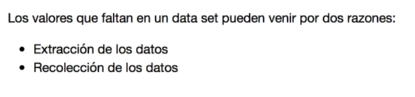

### Borrado de valores que faltan

In [18]:
data.dropna(axis=0,how='all').shape

(1309, 14)

In [15]:
data2=data

In [19]:
data2.dropna(axis=0,how='any').shape

(0, 14)

In [20]:
data3=data

In [24]:
data3.fillna(0).head(2)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,0.0,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,0.0,"Montreal, PQ / Chesterville, ON"


In [25]:
data4=data

In [26]:
data4.fillna('Desconocido').head(2)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29,0,0,24160,211.338,B5,S,2,Desconocido,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.55,C22 C26,S,11,Desconocido,"Montreal, PQ / Chesterville, ON"


In [27]:
data5=data

In [35]:
data5['body']=data5['body'].fillna(0)
data5['home.dest']=data5['home.dest'].fillna('Desconocido')
data5[12:14]

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
12,1,1,"Aubart, Mme. Leontine Pauline",female,24.0,0,0,PC 17477,69.30,B35,C,9,0.0,"Paris, France"
13,1,1,"Barber, Miss. Ellen ""Nellie""",female,26.0,0,0,19877,78.85,NaN,S,6,0.0,Desconocido


In [36]:
pd.isnull(data5['age']).values.ravel().sum()

263

In [39]:
data5['age'].fillna(data['age'].mean()).values[0:10]

array([29.    ,  0.9167,  2.    , 30.    , 25.    , 48.    , 63.    ,
       39.    , 53.    , 71.    ])

In [40]:
data5['age'][1291]

nan

In [43]:
data5['age'].fillna(method='ffill') ## fodwardfill, se remplaza por el primer valor conocido hacia adelante.

0       29.0000
1        0.9167
2        2.0000
3       30.0000
4       25.0000
         ...   
1304    14.5000
1305    14.5000
1306    26.5000
1307    27.0000
1308    29.0000
Name: age, Length: 1309, dtype: float64

In [44]:
data5['age'].fillna(method='backfill') ## backwardfill, se remplaza por el primer valor conocido hacia atrás.

0       29.0000
1        0.9167
2        2.0000
3       30.0000
4       25.0000
         ...   
1304    14.5000
1305    26.5000
1306    26.5000
1307    27.0000
1308    29.0000
Name: age, Length: 1309, dtype: float64